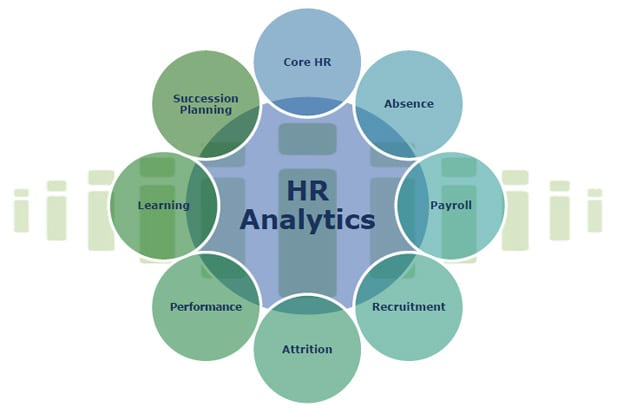

# Brief Insight about HR Analytics:

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1.They first identify a set of employees based on recommendations/ past performance.

2.Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical.

3.At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion



# Aim: To Predict whether to give Promotion to an employee or not

Predict employee is_promoted or not, and those who selected for seperate training and evaluation program have to check their 
training performance, KPIs completion..etc., based on these attributes we should decide whether to give promotion.

# Import Libraries

In [1]:
import pandas as pd

# Pandas:- It is Dataframe Based operation library for Read,Write,Reshape,Concat,Resample and some Data Funations..etc. 
#          Default in Dataframe Row are Observations And Columns are Variables in Table Like Excel.

import numpy as np

# Numapy :- Array/List Based operation for all compitation and Calculations perford from this Library Some Sub libararies in 
#           Numpay 1).Scipy.stats for statistics 2).Statsmodel for timeseries 3).Skleran for Machine learning.

import matplotlib.pyplot as plt

# Matplotlib.pyplot:- Viaulaziation library for Creating Charts and most insights window plots ,Create Lables,Titles...etc

import seaborn as sns

# Seaborn :- Seaborn is a Python data visualization library based on Matplotlib that provides a high-level interface for 
#            creating informative and aesthetically pleasing statistical graphics.

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Finding Data Path

In [2]:
import io

# Io:- Input/Output library for setting up working directory.

%cd "D:\projects\Hr Analytics\DATA"

D:\projects\Hr Analytics\DATA


# Read Data

In [3]:
# Train Data

hrtrain=pd.read_csv("train.csv")

# housetrain is Dataframe Name, pd means pandas , our file is csv thats why .csv

In [4]:
# Test Data

hrtest=pd.read_csv("test.csv")

# housetest is Dataframe Name, pd means pandas , our file is csv thats why .csv

# About Data Train And Test

In [5]:
# Train Data

hrtrain.info()

# info function is used to give size of data, number of rows/observations, number of columns/variables, non-null values, 
#  DataTypes and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
# Test Data

hrtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


# Data Preprocessing

# Adding temporarily dependent variable in Test Data

In [7]:
hrtest["is_promoted"]="test"

# The temporatily depenedent variable is used for row wise concatenation of both Train and test data

# Row Wise concatenation test and train data¶

In [8]:
combine=pd.concat([hrtrain,hrtest],axis=0)

# Axis=0 meaning row wise concatenation

In [9]:
combine=combine.drop("employee_id",axis=1)

# Shape of Data

In [10]:
print("Number of observations:",combine.shape[0])
print("Number of variables:", combine.shape[1])

# Shape[0] finding rows/Observations, Shape[1] finding is Columns/Varables

Number of observations: 78298
Number of variables: 13


# Finding Null values

In [11]:
# Sum of missing values

combine.isnull().sum().sort_values(ascending=False)

previous_year_rating    5936
education               3443
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
# Percentage of missing Values

combine.isnull().sum().sort_values(ascending=False)/combine.shape[0]

previous_year_rating    0.075813
education               0.043973
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

# Missing values imputation

In [13]:
combine.previous_year_rating.value_counts(dropna=False)

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [14]:
combine.previous_year_rating=combine.previous_year_rating.fillna(3.0)

# In previous_year_rating have missing values less then 70% 

In [15]:
combine.previous_year_rating.value_counts(dropna=False)

3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [16]:
combine.education.value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [17]:
combine.education=combine.education.fillna("Bachelor's")

In [18]:
combine.education.value_counts(dropna=False)

Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

combine.info()

In [19]:
combine.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

# Split the data train and test

In [20]:
# Eda must be do on train data

hrtraindf=combine[combine.is_promoted!="test"]
hrtestdf=combine[combine.is_promoted=="test"]

# EDA (Exploratory Data Analysis)

Explorertry Data Analysis main aim is Compltly understand the data

In [21]:
# Descrprtive Stats

hrtraindf.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


# Frequency Count

In [22]:
# Find the number of employees from each eduaction qulification?

hrtraindf.education.value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

Text(0, 0.5, 'Education')

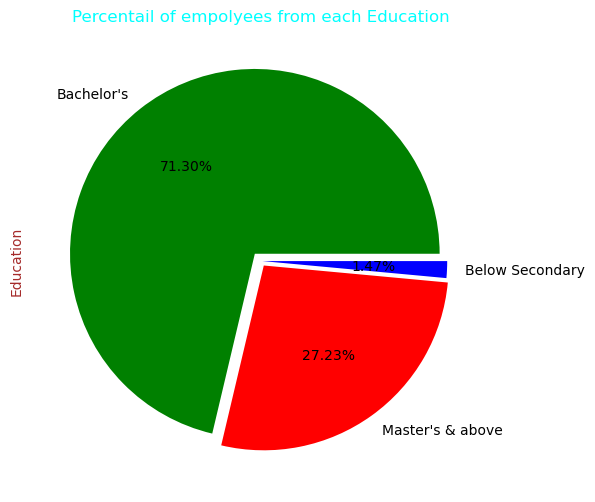

In [23]:
# Visulaization in percentail

hrtraindf.education.value_counts().plot(kind="pie",autopct="%.2f%%",explode=(0.05,0.03,0.01),colors=["green","red","blue"],
                                       figsize=(6,6))
plt.title("Percentail of empolyees from each Education",color="cyan")
plt.ylabel("Education",color="brown")

In [24]:
# Find the number of employees from each department?

hrtraindf.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

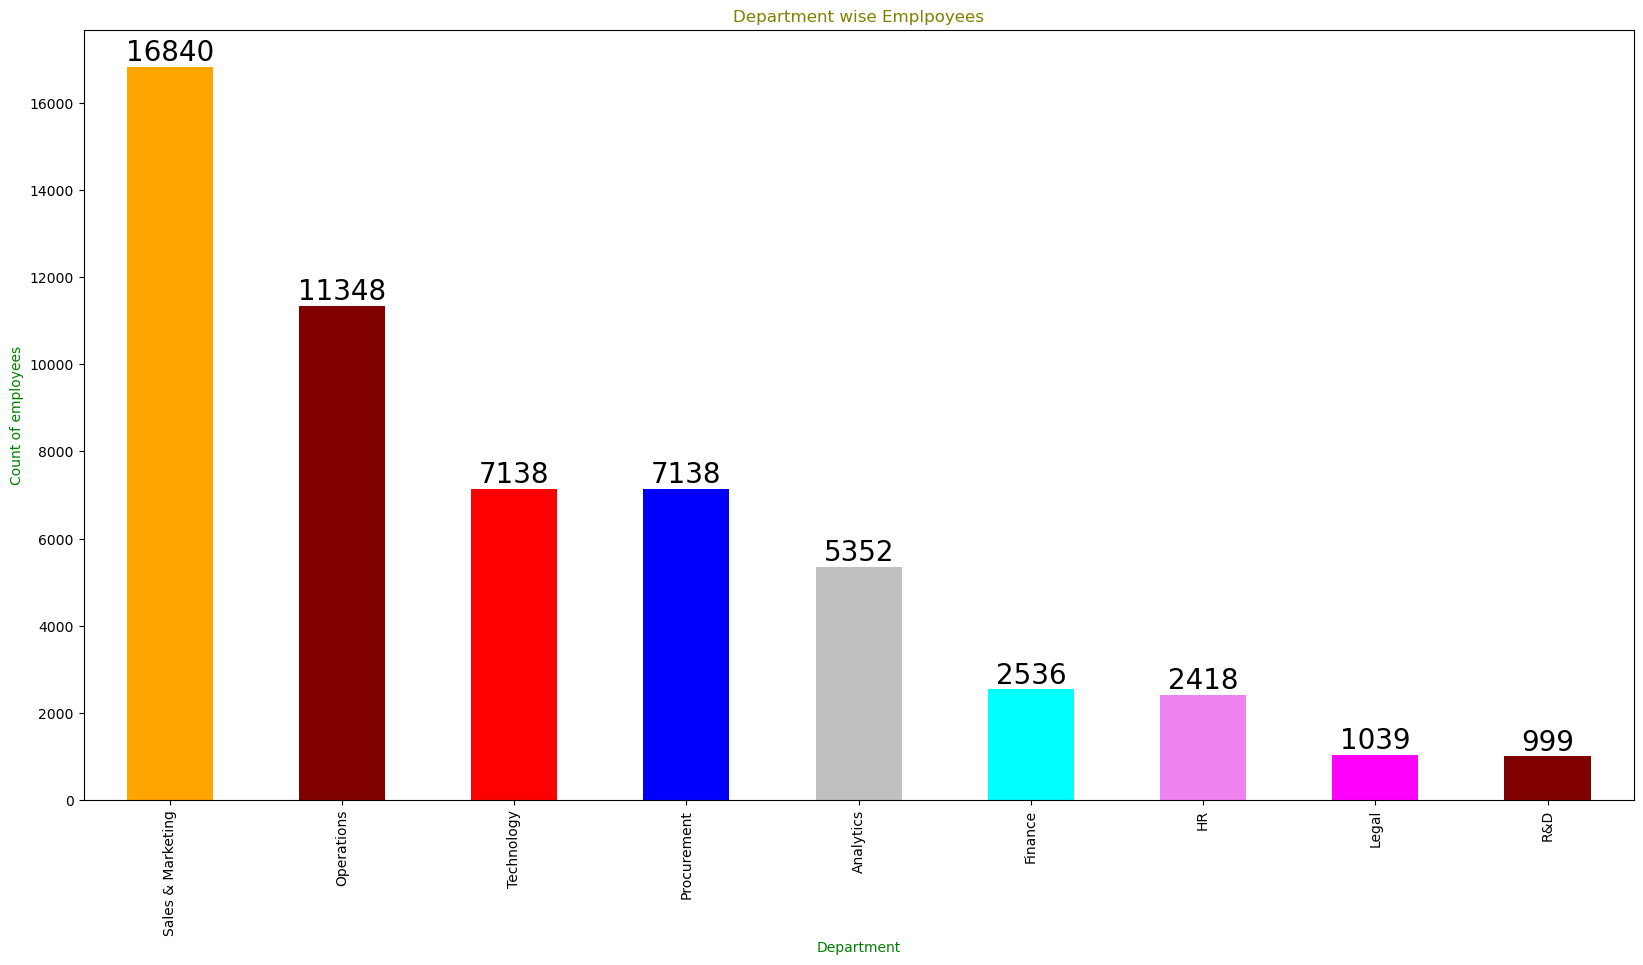

In [25]:
# Visulization in count

plt.figure(figsize=(20,10))


df=hrtraindf.department.value_counts().plot(kind="bar",color=["Orange","Maroon","red","blue","silver","cyan",
                                                              "violet","Magenta","maroon"])
for i in df.containers:
    df.bar_label(i,fontsize=20)
    plt.title("Department wise Emplpoyees",color="olive")
    plt.xlabel("Department",color="green")
    plt.ylabel("Count of employees",color="green")

In [26]:
# Find the number of employees from Male and Female?

hrtraindf.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

Text(0, 0.5, 'Gender')

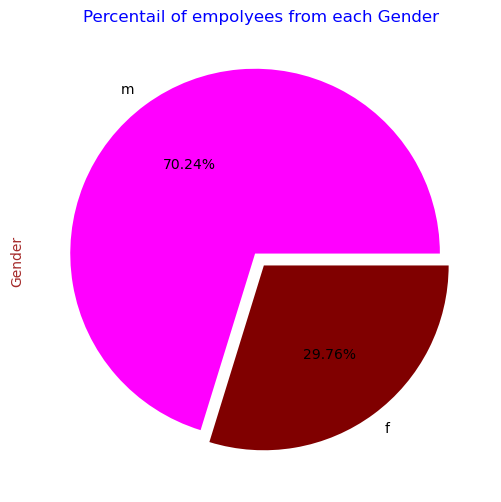

In [27]:
# Visulaization in percentail

hrtraindf.gender.value_counts().plot(kind="pie",autopct="%.2f%%",explode=(0.05,0.03),colors=["Magenta","maroon"],
                                       figsize=(6,6))
plt.title("Percentail of empolyees from each Gender",color="blue")
plt.ylabel("Gender",color="brown")

# Group by

In [28]:
# Find the Average age of each department?

hrtraindf.age.groupby(hrtraindf.department).mean()

department
Analytics            32.431241
Finance              32.058754
HR                   34.385856
Legal                33.832531
Operations           36.073669
Procurement          35.899972
R&D                  32.842843
Sales & Marketing    34.860629
Technology           34.867190
Name: age, dtype: float64

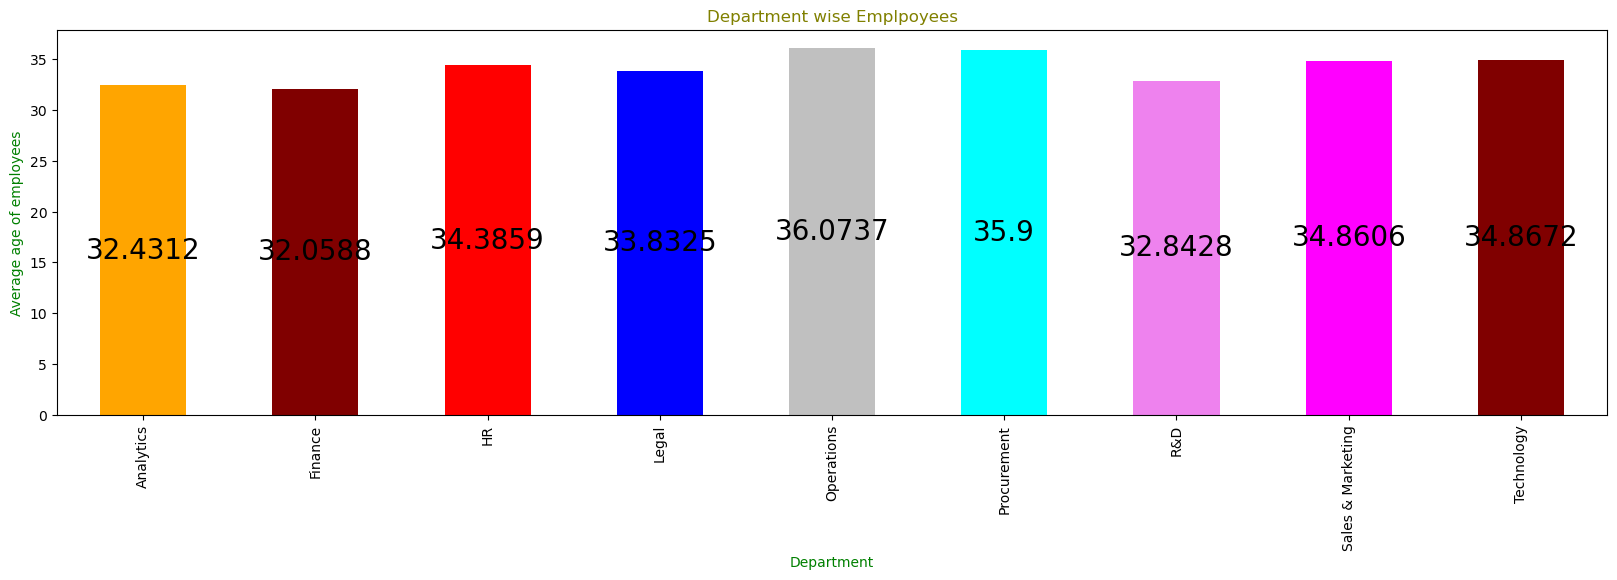

In [29]:
# Visulization Count

plt.figure(figsize=(20,5))
df=hrtraindf.age.groupby(hrtraindf.department).mean().plot(kind="bar",color=["Orange","Maroon","red","blue","silver","cyan",
                                                              "violet","Magenta","maroon"])
for i in df.containers:
    df.bar_label(i,fontsize=20,label_type="center")
    plt.title("Department wise Emplpoyees",color="olive")
    plt.xlabel("Department",color="green")
    plt.ylabel("Average age of employees",color="green")

In [30]:
# Find the Average leanth_of_service of recruitment_channel

hrtraindf.length_of_service.groupby(hrtraindf.recruitment_channel).mean()

recruitment_channel
other       5.892991
referred    4.979860
sourcing    5.873040
Name: length_of_service, dtype: float64

Text(0, 0.5, 'recruitment_channel')

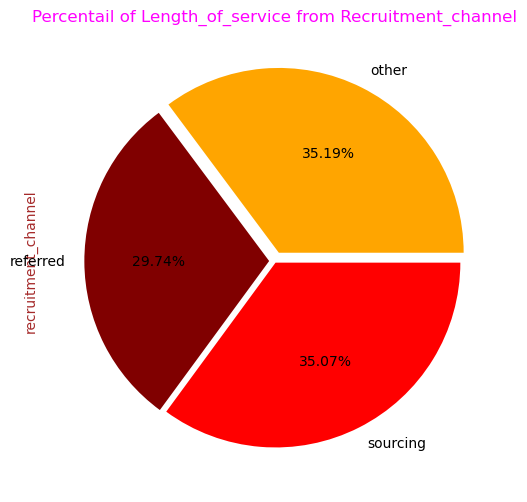

In [31]:
# Visulization

hrtraindf.length_of_service.groupby(hrtraindf.recruitment_channel).mean().plot(kind="pie",autopct="%.2f%%",
                                    explode=(0.05,0.03,0.01),colors=["Orange","Maroon","red",],figsize=(6,6))

plt.title("Percentail of Length_of_service from Recruitment_channel",color="Magenta")
plt.ylabel("recruitment_channel",color="brown")

In [32]:
# Find the sum of avg_training_score from is_promoted

hrtraindf.avg_training_score.groupby(hrtraindf.is_promoted).sum()

is_promoted
0    3141155
1     332946
Name: avg_training_score, dtype: int64

Text(0, 0.5, 'is_promoted')

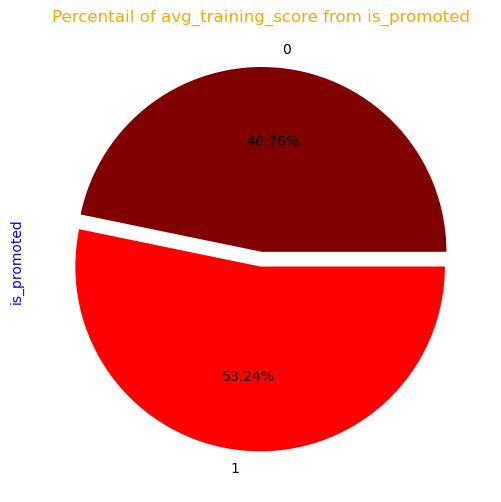

In [33]:
# Visulization

hrtraindf.avg_training_score.groupby(hrtraindf.is_promoted).mean().plot(kind="pie",autopct="%.2f%%",
                                    explode=(0.05,0.03),colors=["Maroon","red",],figsize=(6,6))

plt.title("Percentail of avg_training_score from is_promoted",color="orange")
plt.ylabel("is_promoted",color="blue")

# Cross Tabulation

In [34]:
# find the how many male employees and female empolyees from each department

pd.crosstab(hrtraindf.department,hrtraindf.gender)

gender,f,m
department,,
Analytics,513,4839
Finance,681,1855
HR,1006,1412
Legal,149,890
Operations,4677,6671
Procurement,3287,3851
R&D,57,942
Sales & Marketing,3154,13686
Technology,2788,4350


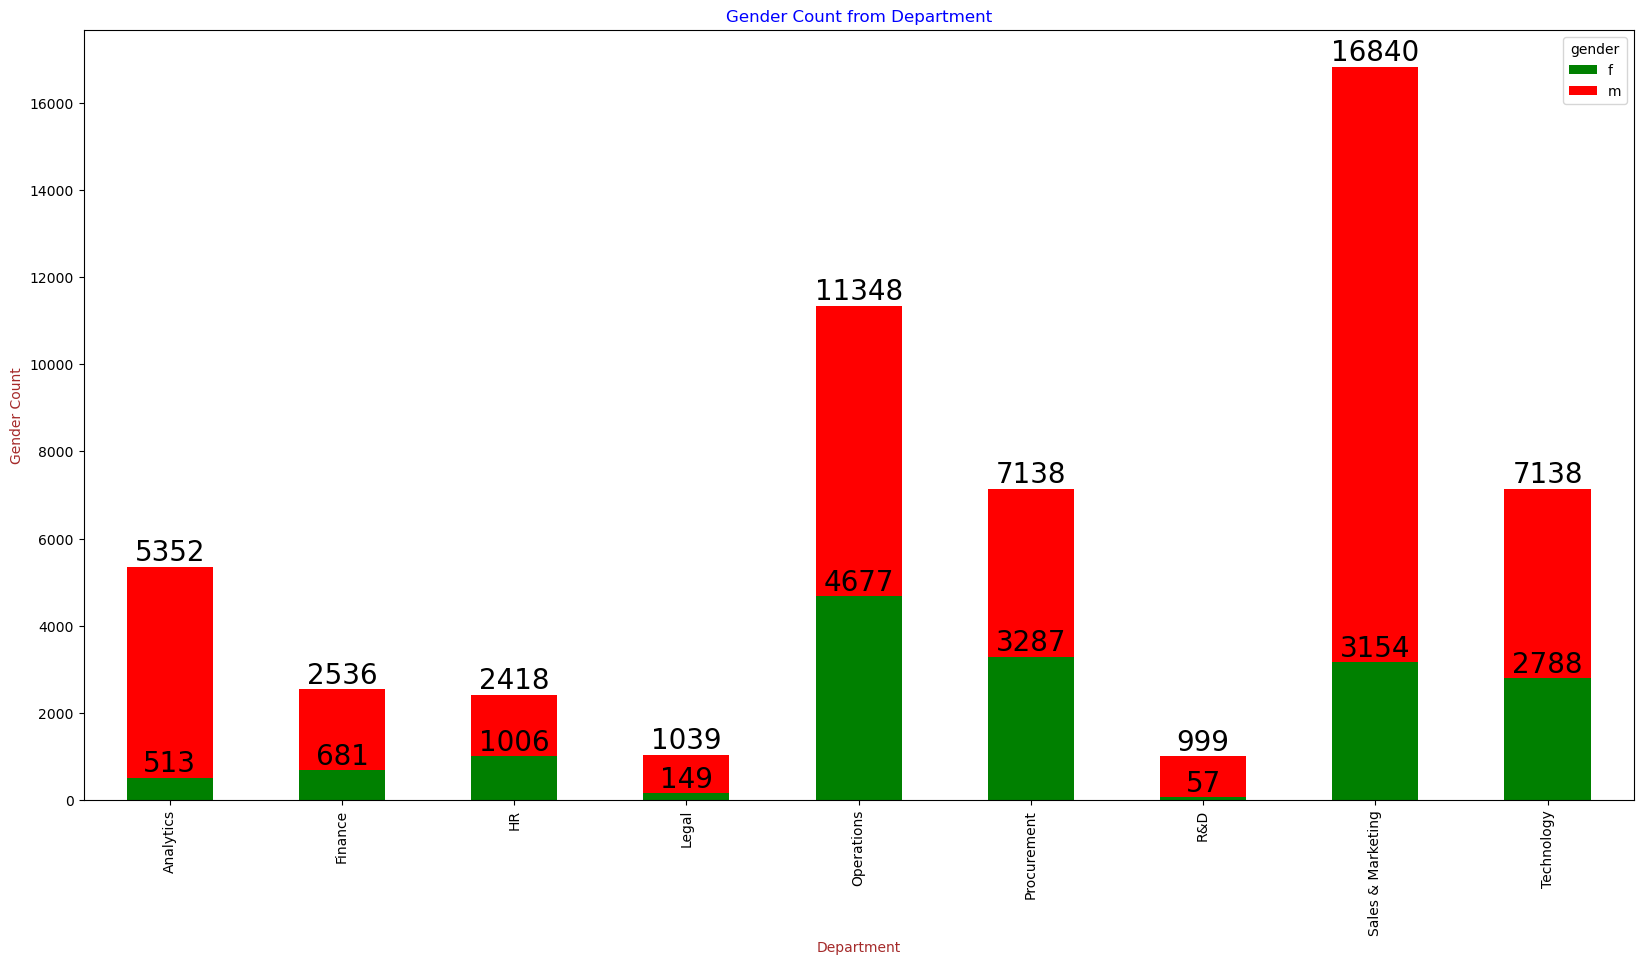

In [35]:
# Visulization

df=pd.crosstab(hrtraindf.department,hrtraindf.gender)
ax=df.plot.bar(stacked=True,color=["green","red"],figsize=(20,10))
for i in ax.containers:
    ax.bar_label(i,fontsize=20)
    plt.title("Gender Count from Department",color="blue")
    plt.xlabel("Department",color="brown")
    plt.ylabel("Gender Count",color="brown")
    

In [36]:
# find the how many employees promoted from each education 

pd.crosstab(hrtraindf.education,hrtraindf.is_promoted)

is_promoted,0,1
education,,
Bachelor's,35948,3130
Below Secondary,738,67
Master's & above,13454,1471


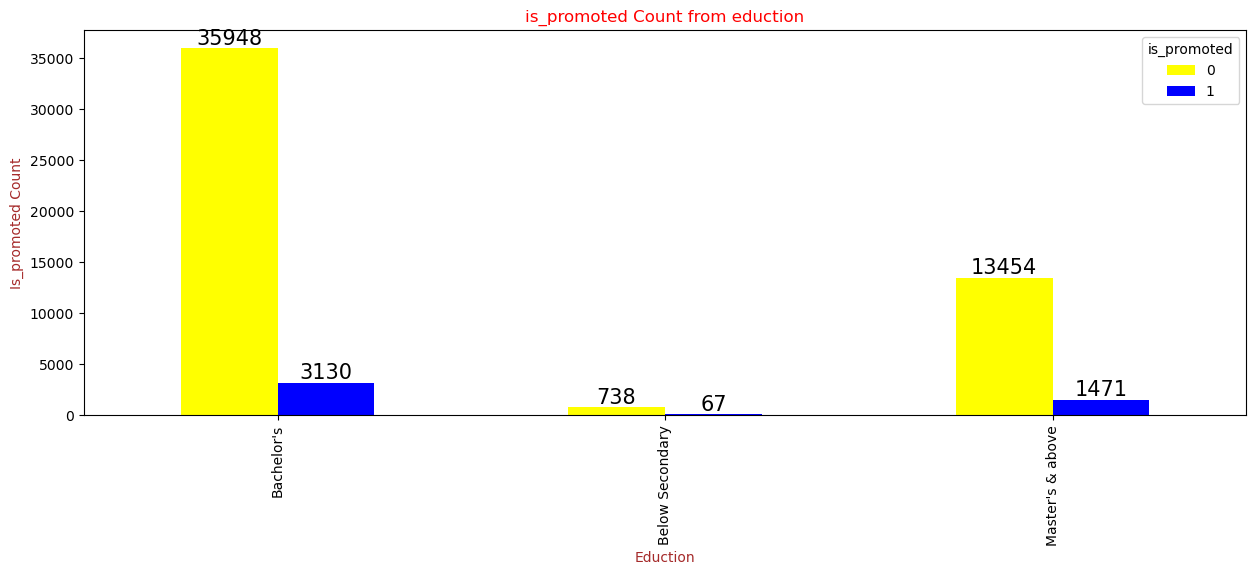

In [37]:
# Visulization

df=pd.crosstab(hrtraindf.education,hrtraindf.is_promoted)
ax=df.plot.bar(stacked=False,color=["yellow","blue"],figsize=(15,5))
for i in ax.containers:
    ax.bar_label(i,fontsize=15)
    plt.title("is_promoted Count from eduction",color="red")
    plt.xlabel("Eduction",color="brown")
    plt.ylabel("Is_promoted Count",color="brown")
    

# Hypothesis Testing

In [38]:
# Test Null Average avg_training_score of is_promoted equal

hrtraindf.avg_training_score.groupby(hrtraindf.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [39]:
from scipy.stats import ttest_ind # Only 2classes 

In [40]:
# split classes

promoted0=hrtraindf[hrtraindf.is_promoted==0]
promoted1=hrtraindf[hrtraindf.is_promoted==1]

In [41]:
ttest_ind(promoted0.avg_training_score,promoted1.avg_training_score,equal_var=False)

# since pvalue=7.662329172468838e-291 is less than 0.05,Reject Null

Ttest_indResult(statistic=-38.82675007357188, pvalue=7.662329172468838e-291)

In [42]:
# Test the null average avg_training_score of Gender equale

hrtraindf.avg_training_score.groupby(hrtraindf.gender).mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [43]:
# split classes

genderf=hrtraindf[hrtraindf.gender=="f"]
genderm=hrtraindf[hrtraindf.gender=="m"]

In [44]:
ttest_ind(genderf.avg_training_score,genderm.avg_training_score,equal_var=False)

# since pvalue=9.321257169457854e-10 is less than 0.05,Reject Null

Ttest_indResult(statistic=6.122262326710494, pvalue=9.321257169457854e-10)

In [45]:
# Test Null Average length_of_service of different education equal

hrtraindf.length_of_service.groupby(hrtraindf.education).mean()

education
Bachelor's          5.286760
Below Secondary     1.704348
Master's & above    7.605293
Name: length_of_service, dtype: float64

In [46]:
from scipy.stats import f_oneway # More then 2 classes

In [47]:
# Split Data

bachelor=hrtraindf[hrtraindf.education=="Bachelor's"]
Secondary=hrtraindf[hrtraindf.education=="Below Secondary"]
MS=hrtraindf[hrtraindf.education=="Master's & above"]

In [48]:
f_oneway(bachelor.length_of_service,Secondary.length_of_service,MS.length_of_service)

#since pvalue=0.0 is less than 0.05,Reject Null

F_onewayResult(statistic=2139.467105075957, pvalue=0.0)

In [49]:
# Test Null Average avg_training_score of different region equal

hrtraindf.avg_training_score.groupby(hrtraindf.region).mean()

region
region_1     60.318033
region_10    63.243827
region_11    63.227376
region_12    61.396000
region_13    62.513595
region_14    61.551391
region_15    62.085826
region_16    61.873720
region_17    65.894472
region_18    51.096774
region_19    61.270023
region_2     63.124605
region_20    61.778824
region_21    61.659367
region_22    65.699440
region_23    64.330213
region_24    64.600394
region_25    62.490842
region_26    65.084071
region_27    63.486438
region_28    61.633536
region_29    65.749497
region_3     57.979769
region_30    62.076104
region_31    63.313695
region_32    62.201058
region_33    67.951673
region_34    62.763699
region_4     62.633001
region_5     66.571802
region_6     61.089855
region_7     63.940946
region_8     63.680916
region_9     61.052381
Name: avg_training_score, dtype: float64

In [50]:
# Split Classes

region1=hrtraindf[hrtraindf.region=="region_1"]     
region10=hrtraindf[hrtraindf.region=="region_10"]   
region11=hrtraindf[hrtraindf.region=="region_11"]   
region12=hrtraindf[hrtraindf.region=="region_12"]    
region13=hrtraindf[hrtraindf.region=="region_13"] 
region14=hrtraindf[hrtraindf.region=="region_14"] 
region15=hrtraindf[hrtraindf.region=="region_15"]    
region16=hrtraindf[hrtraindf.region=="region_16"]   
region17=hrtraindf[hrtraindf.region=="region_17"]    
region18=hrtraindf[hrtraindf.region=="region_18"]    
region19=hrtraindf[hrtraindf.region=="region_19"]    
region2=hrtraindf[hrtraindf.region=="region_2"]     
region20=hrtraindf[hrtraindf.region=="region_20"]    
region21=hrtraindf[hrtraindf.region=="region_21"]    
region22=hrtraindf[hrtraindf.region=="region_22"]    
region23=hrtraindf[hrtraindf.region=="region_23"]    
region24=hrtraindf[hrtraindf.region=="region_24"]    
region25=hrtraindf[hrtraindf.region=="region_25"]    
region26=hrtraindf[hrtraindf.region=="region_26"]    
region27=hrtraindf[hrtraindf.region=="region_27"]    
region28=hrtraindf[hrtraindf.region=="region_28"]    
region29=hrtraindf[hrtraindf.region=="region_29"]    
region3=hrtraindf[hrtraindf.region=="region_3"]     
region30=hrtraindf[hrtraindf.region=="region_30"]   
region31=hrtraindf[hrtraindf.region=="region_31"]    
region32=hrtraindf[hrtraindf.region=="region_32"]    
region33=hrtraindf[hrtraindf.region=="region_33"]    
region34=hrtraindf[hrtraindf.region=="region_34"]    
region4=hrtraindf[hrtraindf.region=="region_4"]     
region5=hrtraindf[hrtraindf.region=="region_5"]     
region6=hrtraindf[hrtraindf.region=="region_6"]     
region7=hrtraindf[hrtraindf.region=="region_7"]     
region8=hrtraindf[hrtraindf.region=="region_8"]    
region9=hrtraindf[hrtraindf.region=="region_9"]

In [51]:
f_oneway(region1.avg_training_score,region10.avg_training_score,region11.avg_training_score,region12.avg_training_score,
         region13.avg_training_score,region14.avg_training_score,region15.avg_training_score,region16.avg_training_score,
         region17.avg_training_score,region18.avg_training_score,region19.avg_training_score,
         region2.avg_training_score,region20.avg_training_score,region21.avg_training_score,region22.avg_training_score,
         region23.avg_training_score,region24.avg_training_score,region25.avg_training_score,region26.avg_training_score,
         region27.avg_training_score,region28.avg_training_score,region29.avg_training_score,
         region3.avg_training_score,region30.avg_training_score,region31.avg_training_score,region32.avg_training_score,
         region33.avg_training_score,region34.avg_training_score,
         region4.avg_training_score,region5.avg_training_score,region6.avg_training_score,region7.avg_training_score,
         region8.avg_training_score,region9.avg_training_score)

# Scince pvalue=6.581226882678422e-128 less then 0.05 reject Null.

F_onewayResult(statistic=21.625376368760996, pvalue=6.581226882678422e-128)

In [52]:
# Test Null No Association between is_promoted and gender

pd.crosstab(hrtraindf.is_promoted,hrtraindf.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [53]:
from scipy.stats import chi2_contingency # Test between Two Catgorical variables

In [54]:
chi2_contingency(pd.crosstab(hrtraindf.is_promoted,hrtraindf.gender))

# since pvalue=0.009765091521176657 is less than 0.05,Reject Null

Chi2ContingencyResult(statistic=6.677254566546107, pvalue=0.009765091521176657, dof=1, expected_freq=array([[14922.70617428, 35217.29382572],
       [ 1389.29382572,  3278.70617428]]))

In [55]:
# Test Null No Association between is_promoted and department

pd.crosstab(hrtraindf.is_promoted,hrtraindf.department)

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
is_promoted,,,,,,,,,
0,4840,2330,2282,986,10325,6450,930,15627,6370
1,512,206,136,53,1023,688,69,1213,768


In [56]:
chi2_contingency(pd.crosstab(hrtraindf.is_promoted,hrtraindf.department))

# since pvalue=9.882497107474489e-29 is less than 0.05,Reject Null

Chi2ContingencyResult(statistic=151.42635516323872, pvalue=9.882497107474489e-29, dof=8, expected_freq=array([[ 4896.1699022 ,  2320.00875785,  2212.05882353,   950.50831995,
        10381.49029339,  6530.05619618,   913.91512188, 15405.73638885,
         6530.05619618],
       [  455.8300978 ,   215.99124215,   205.94117647,    88.49168005,
          966.50970661,   607.94380382,    85.08487812,  1434.26361115,
          607.94380382]]))

# Modles Building

In [57]:
# Agine Concat the train and test data

combine_df=pd.concat([hrtraindf,hrtestdf],axis=0)

In [58]:
# Split data object columns and Numerical columns

objcols=combine_df[['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating','KPIs_met >80%', 'awards_won?']]

In [59]:
numcols=combine_df[['no_of_trainings', 'age','length_of_service','avg_training_score']]

In [60]:
objcols.head()

,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?
0,Sales & Marketing,region_7,Master's & above,f,sourcing,5.0,1,0
1,Operations,region_22,Bachelor's,m,other,5.0,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,3.0,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,1.0,0,0
4,Technology,region_26,Bachelor's,m,other,3.0,0,0


In [61]:
# Dummies --- catgorical obejects assign in numaric identifier binary (0 and 1) add anthoer variables based on classes.

objcols_dummie=pd.get_dummies(objcols,columns=['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating','KPIs_met >80%', 'awards_won?'])

In [62]:
objcols_dummie.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,...,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [63]:
numcols.head()

,no_of_trainings,age,length_of_service,avg_training_score
0,1,35,8,49
1,1,30,4,60
2,1,34,7,50
3,2,39,10,50
4,1,45,2,73


In [64]:
# Checking multi collinarity

numcols.corr()

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.082536,-0.058403,0.044180
age,-0.082536,1.000000,0.653339,-0.044592
length_of_service,-0.058403,0.653339,1.000000,-0.035272
avg_training_score,0.044180,-0.044592,-0.035272,1.000000


<Axes: >

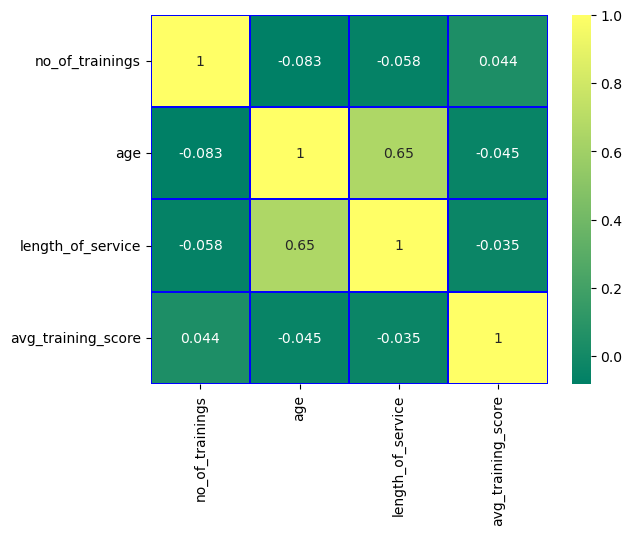

In [65]:
sns.heatmap(numcols.corr(),annot=True,cmap="summer",linecolor="blue",linewidths=0.05)

# No Multi collinarity

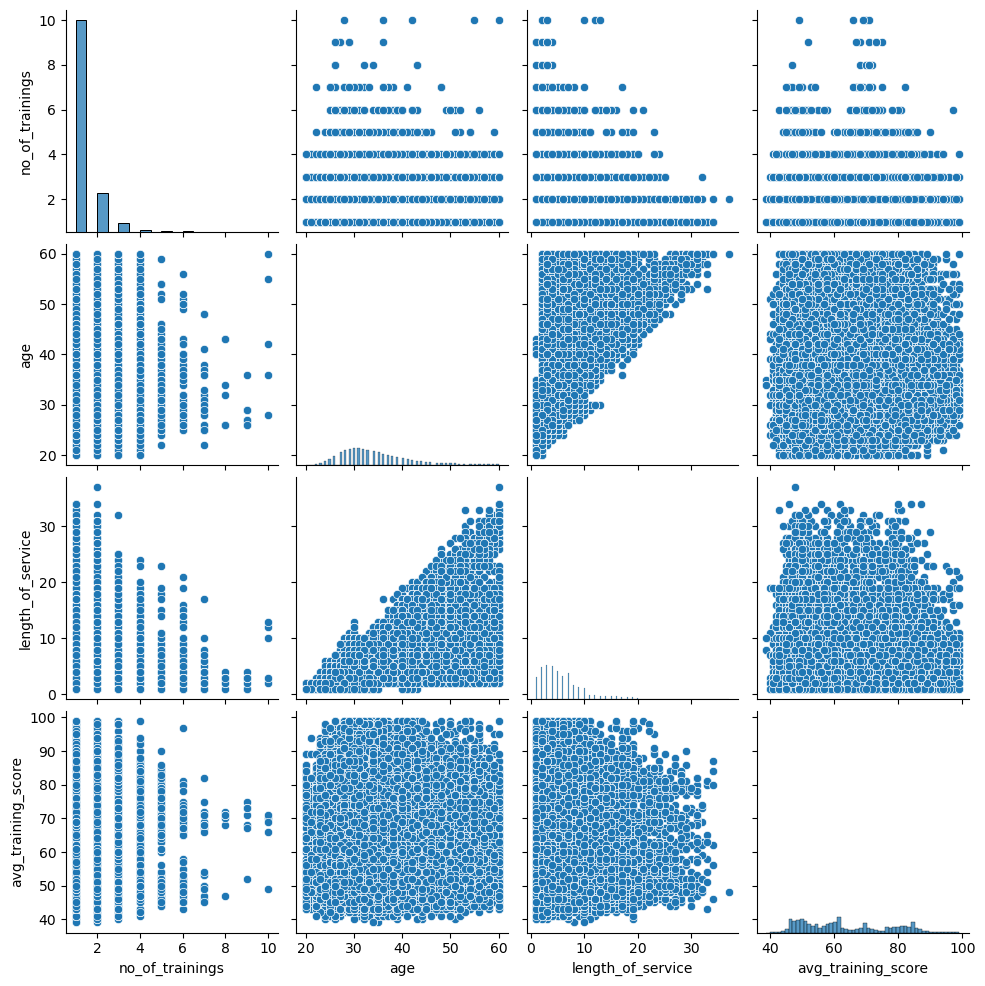

In [66]:
sns.pairplot(numcols)

# Checking Direction of Variables

In [67]:
combine_df_clean=pd.concat([numcols,objcols_dummie,combine_df.is_promoted],axis=1)

In [68]:
# Split Train And test Data

hrtraindf_clean=combine_df_clean[combine_df_clean.is_promoted!="test"]
hrtestdf_clean=combine_df_clean[combine_df_clean.is_promoted=="test"]

In [69]:
# Split Dependent and independent Variables

y=hrtraindf_clean.is_promoted
X=hrtraindf_clean.drop("is_promoted",axis=1)

In [70]:
y.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

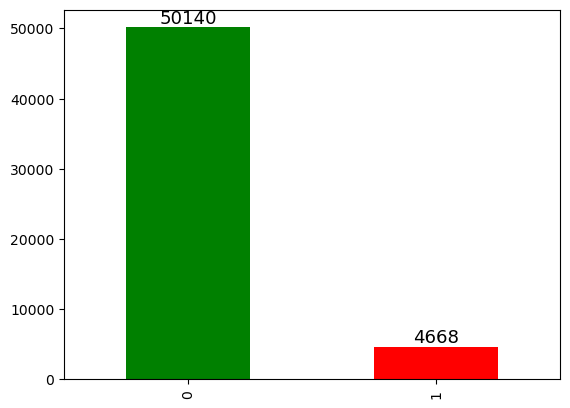

In [71]:
df=y.value_counts().plot(kind="bar",color=["green","red"])
for i in df.containers:
    df.bar_label(i,fontsize=13)
    
    # Imbalance Data--- Big difference between classes

In [72]:
# Encode the dependent variable

from sklearn.preprocessing import LabelEncoder

In [73]:
y=LabelEncoder().fit_transform(y)

In [74]:
y=pd.DataFrame(y,columns=["is_promoted"])

In [75]:
y.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


In [76]:
# Classification Models

# When dependent variable non-numaric ,Catgorical we build the classification models

# Models build on Imbalanced data

# 1. LogisticRegression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logit=LogisticRegression(max_iter=3000)

In [79]:
logitmodel=logit.fit(X,y)

In [80]:
logitmodel.score(X,y)

0.9317435410888921

In [81]:
logitpred=logitmodel.predict(X)

Checking cross_val_score,Roc Curve ,Classification Report, Confusion Matrix display

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay,ConfusionMatrixDisplay,classification_report

In [83]:
cross_val_score(logit,X,y)

array([0.93267652, 0.93030469, 0.93048714, 0.93321777, 0.93066326])

In [84]:
np.mean([0.93267652, 0.93030469, 0.93048714, 0.93321777, 0.93066326])

0.9314698760000001

In [85]:
print(classification_report(y,logitpred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     50140
           1       0.80      0.26      0.40      4668

    accuracy                           0.93     54808
   macro avg       0.87      0.63      0.68     54808
weighted avg       0.92      0.93      0.92     54808



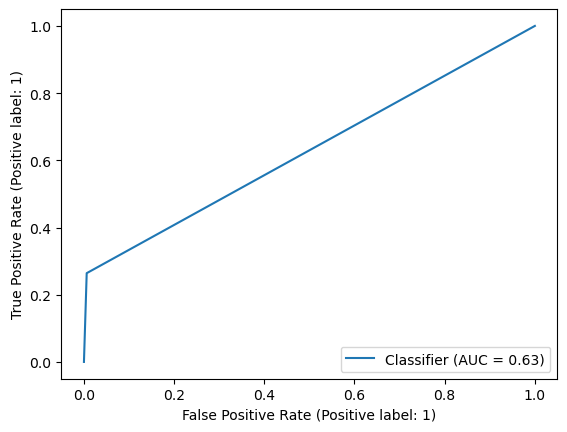

In [86]:
RocCurveDisplay.from_predictions(y,logitpred)

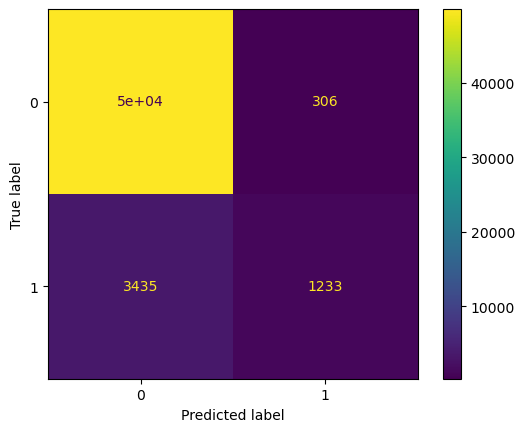

In [87]:
ConfusionMatrixDisplay.from_predictions(y,logitpred)

In [88]:
# Get predicted probabilities

logitpred_prob=logitmodel.predict_proba(X)[:,1]

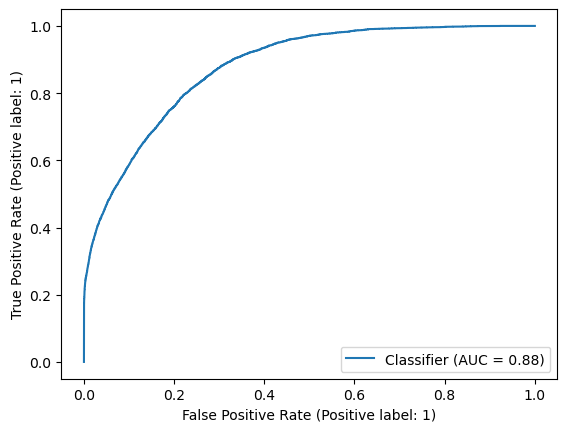

In [89]:
RocCurveDisplay.from_predictions(y,logitpred_prob)

# 2.DecisionTreeClassifier

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
tree=DecisionTreeClassifier(max_depth=8)

In [92]:
treemodel=tree.fit(X,y)

In [93]:
treemodel.score(X,y)

0.9360129908042621

In [94]:
treepred=treemodel.predict(X)

In [95]:
print(classification_report(y,treepred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     50140
           1       0.98      0.25      0.40      4668

    accuracy                           0.94     54808
   macro avg       0.96      0.63      0.68     54808
weighted avg       0.94      0.94      0.92     54808



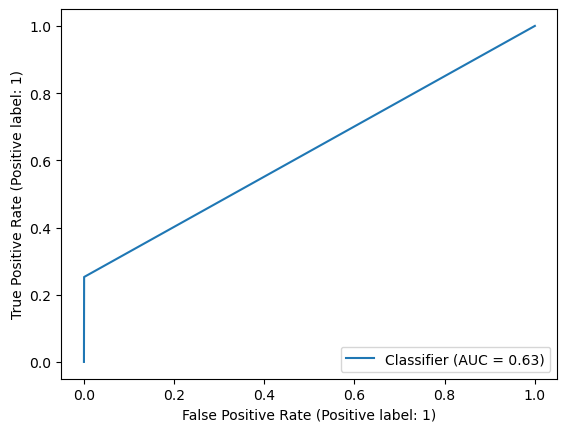

In [96]:
RocCurveDisplay.from_predictions(y,treepred)

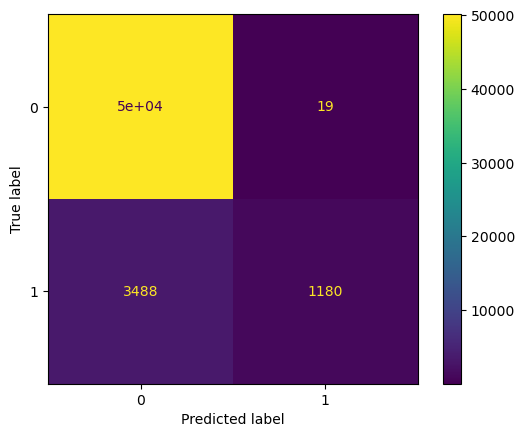

In [97]:
ConfusionMatrixDisplay.from_predictions(y,treepred)

In [98]:
treepred_prob=treemodel.predict_proba(X)[:,1]

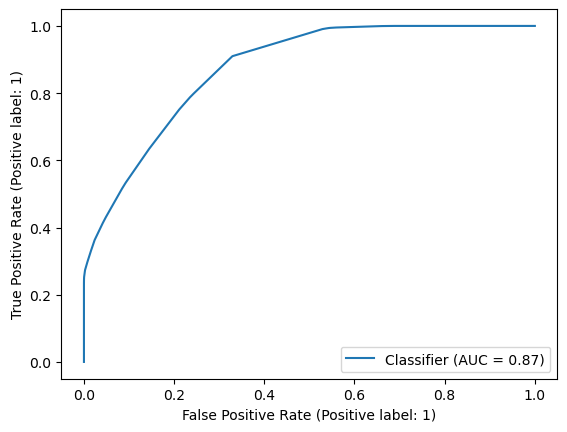

In [99]:
RocCurveDisplay.from_predictions(y,treepred_prob)

# 3.Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rfc=RandomForestClassifier(n_estimators=1000)

In [102]:
rfcmodel=rfc.fit(X,y)

In [103]:
rfcmodel.score(X,y)

0.999744562837542

In [104]:
rfcmodelpred=rfcmodel.predict(X)

In [105]:
print(classification_report(y,rfcmodelpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50140
           1       1.00      1.00      1.00      4668

    accuracy                           1.00     54808
   macro avg       1.00      1.00      1.00     54808
weighted avg       1.00      1.00      1.00     54808



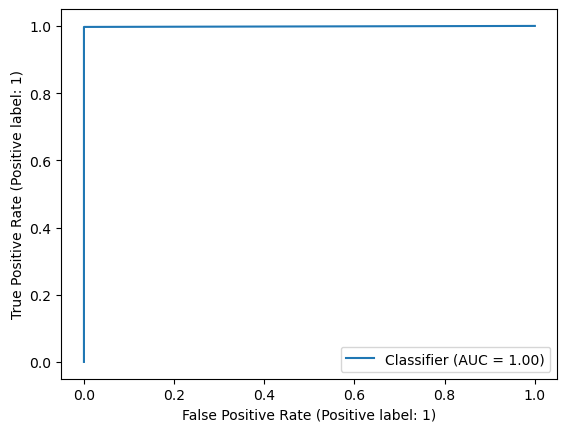

In [106]:
RocCurveDisplay.from_predictions(y,rfcmodelpred)

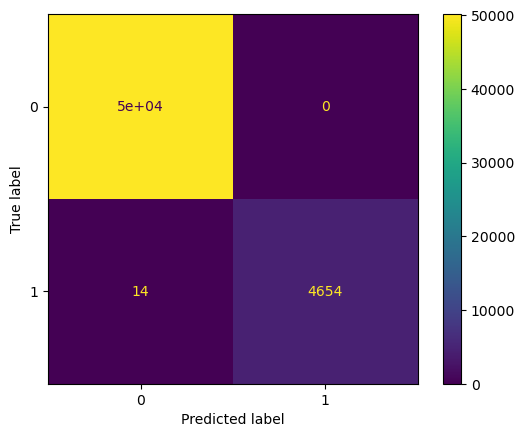

In [107]:
ConfusionMatrixDisplay.from_predictions(y,rfcmodelpred)

In [108]:
rfcmodel_prob=rfcmodel.predict_proba(X)[:,1]

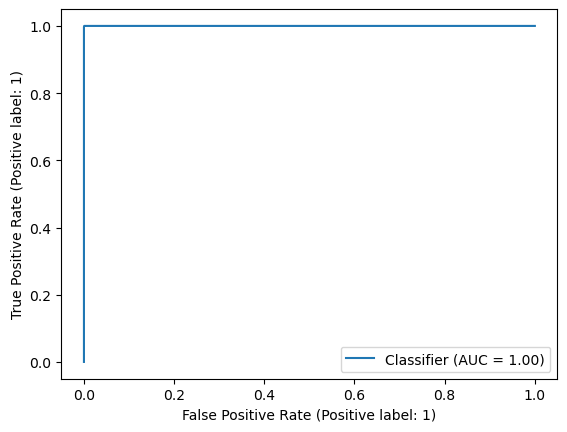

In [109]:
RocCurveDisplay.from_predictions(y,rfcmodel_prob)

# 4.Gradient Boosting

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
gbc=GradientBoostingClassifier(max_depth=20)

In [112]:
gbcmodel=gbc.fit(X,y)

In [113]:
gbcmodel.score(X,y)

0.999744562837542

In [114]:
gbcmodelpred=gbcmodel.predict(X)

In [115]:
print(classification_report(y,gbcmodelpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50140
           1       1.00      1.00      1.00      4668

    accuracy                           1.00     54808
   macro avg       1.00      1.00      1.00     54808
weighted avg       1.00      1.00      1.00     54808



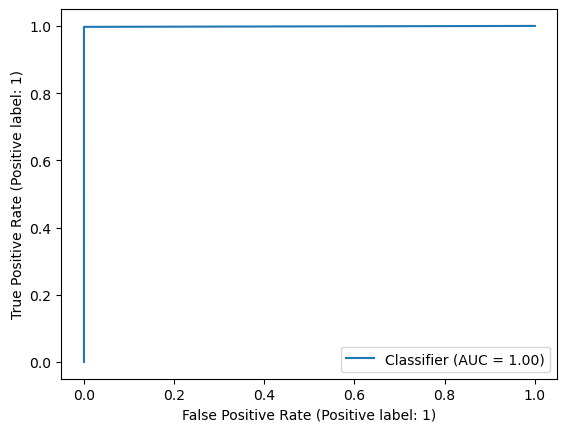

In [116]:
RocCurveDisplay.from_predictions(y,gbcmodelpred)

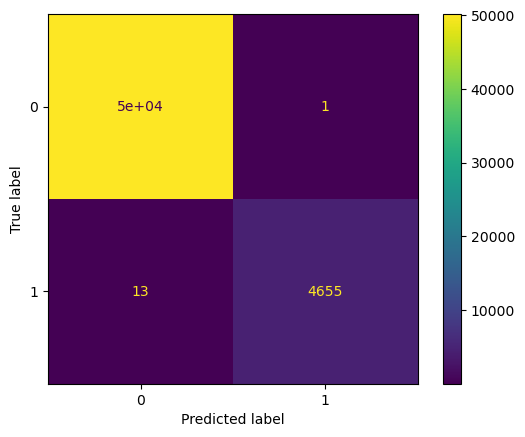

In [117]:
ConfusionMatrixDisplay.from_predictions(y,gbcmodelpred)

In [118]:
gbcmodel_prob=gbcmodel.predict_proba(X)[:,1]

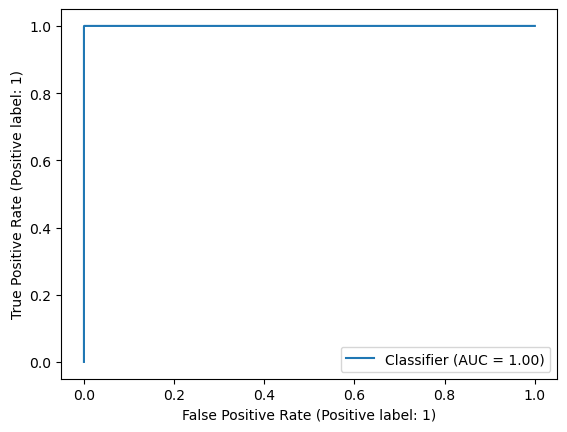

In [119]:
RocCurveDisplay.from_predictions(y,gbcmodel_prob)

# 5.Support vector 

In [120]:
from sklearn.svm import SVC

In [121]:
svc=SVC()

In [122]:
svcmodel=svc.fit(X,y)

In [123]:
svcmodel.score(X,y)

0.9148299518318493

In [124]:
svcmodel_ped=svcmodel.predict(X)

In [125]:
print(classification_report(y,svcmodel_ped))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     50140
           1       0.00      0.00      0.00      4668

    accuracy                           0.91     54808
   macro avg       0.46      0.50      0.48     54808
weighted avg       0.84      0.91      0.87     54808



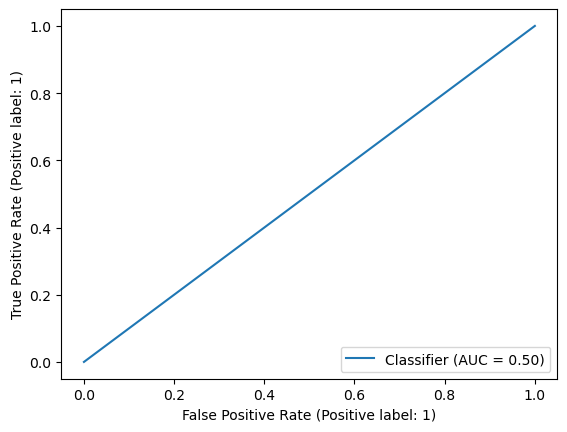

In [126]:
RocCurveDisplay.from_predictions(y,svcmodel_ped)

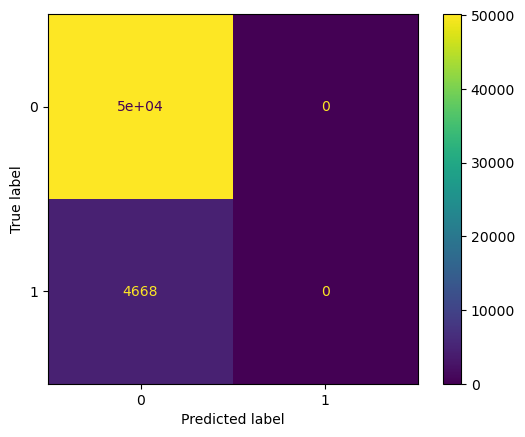

In [127]:
ConfusionMatrixDisplay.from_predictions(y,svcmodel_ped)

# 6.KNeighborsClassifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [129]:
knn=KNeighborsClassifier()

In [130]:
krange=list(range(1,21))
param_grid=dict(n_neighbors=krange)
grid=GridSearchCV(knn,param_grid,cv=3)

In [131]:
grid_search=grid.fit(X,y)

In [132]:
grid_search.best_score_

0.9236790255748318

In [133]:
grid_search.best_params_

{'n_neighbors': 13}

In [134]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [135]:
knn=KNeighborsClassifier(n_neighbors=13)

In [136]:
knnmodel=knn.fit(X,y)

In [137]:
knnmodel.score(X,y)

0.9247737556561086

In [138]:
knnmodel_pred=knnmodel.predict(X)

In [139]:
print(classification_report(y,knnmodel_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       0.94      0.12      0.22      4668

    accuracy                           0.92     54808
   macro avg       0.93      0.56      0.59     54808
weighted avg       0.93      0.92      0.90     54808



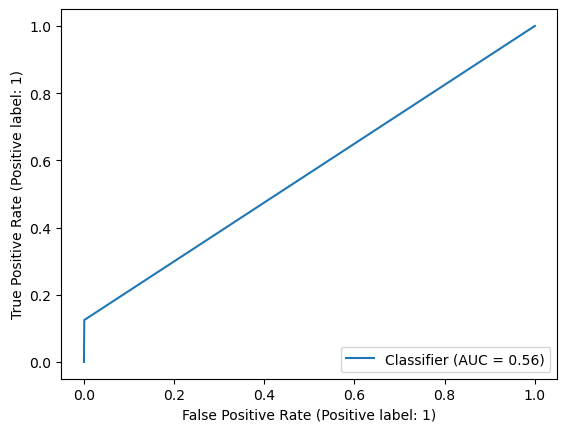

In [140]:
RocCurveDisplay.from_predictions(y,knnmodel_pred)

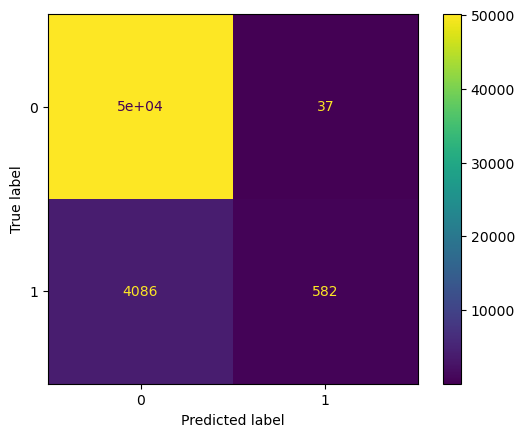

In [141]:
ConfusionMatrixDisplay.from_predictions(y,knnmodel_pred)

In [142]:
knnmodel_prob=knnmodel.predict_proba(X)[:,1]

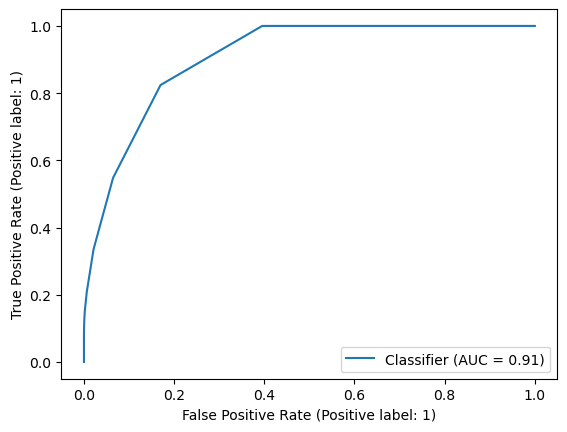

In [143]:
RocCurveDisplay.from_predictions(y,knnmodel_prob)

In [144]:
combine_df_clean.head()

,no_of_trainings,age,length_of_service,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1,is_promoted
0,1,35,8,49,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,1,30,4,60,0,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,1,34,7,50,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,2,39,10,50,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,1,45,2,73,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


# Due to Imbalance in Data, To balance the Data Sampling Technique is used

In [145]:
# Due to imbalance in data, minority class prediction is worst
# So, we will do sampling 

from imblearn.over_sampling import SMOTENC

In [146]:
smote=SMOTENC(categorical_features=list(range(4,64)),random_state=42)

In [147]:
x_smt,y_smt=smote.fit_resample(X,y)

In [148]:
y_smt=pd.DataFrame(y_smt,columns=["is_promoted"])

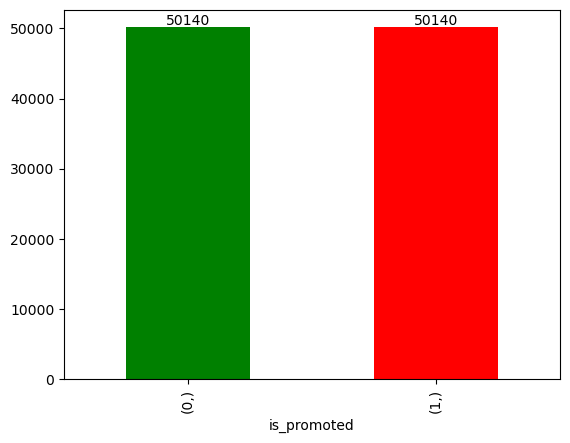

In [149]:
# Visulization target variable after balanced

df=y_smt.value_counts().plot(kind="bar",color=["green","red"])
for i in df.containers:
    df.bar_label(i,fontsize=10)
    
    # Data is Balanced

# Models Building on balanced Data

# 1.Logistic Regression

In [150]:
logitmodel_bal=logit.fit(x_smt,y_smt)

In [151]:
logitmodel_bal.score(x_smt,y_smt)

0.8804547267650579

In [152]:
logitmodel_bal_pred=logitmodel_bal.predict(x_smt)

In [153]:
print(classification_report(y_smt,logitmodel_bal_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     50140
           1       0.89      0.87      0.88     50140

    accuracy                           0.88    100280
   macro avg       0.88      0.88      0.88    100280
weighted avg       0.88      0.88      0.88    100280



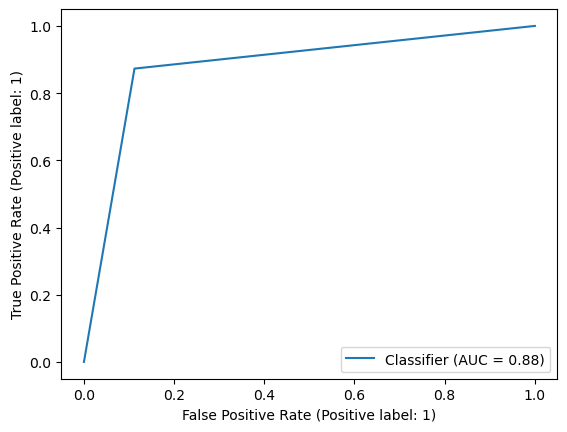

In [154]:
RocCurveDisplay.from_predictions(y_smt,logitmodel_bal_pred)

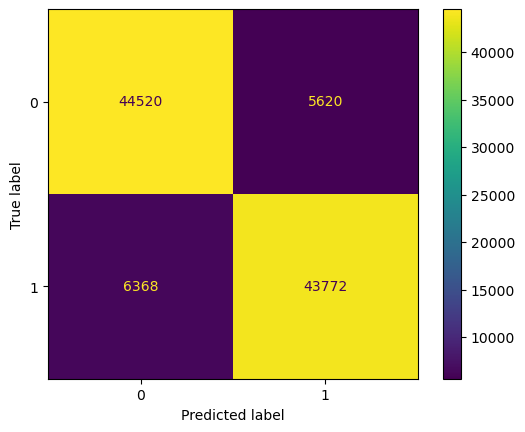

In [155]:
ConfusionMatrixDisplay.from_predictions(y_smt,logitmodel_bal_pred)

In [156]:
logitmodel_bal_prob=logitmodel_bal.predict_proba(x_smt)[:,1]

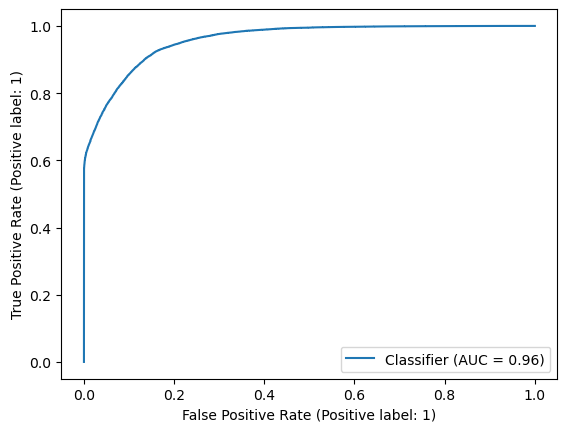

In [157]:
RocCurveDisplay.from_predictions(y_smt,logitmodel_bal_prob)

In [158]:
hrtestdf_clean=hrtestdf_clean.drop("is_promoted",axis=1)

In [159]:
logitmodel_bal_pred1=logitmodel_bal.predict(hrtestdf_clean)

In [160]:
pd.DataFrame(logitmodel_bal_pred1).to_csv("Logit_bal.csv")

# 2.Decision Tree

In [161]:
treemodel_bal=tree.fit(x_smt,y_smt)

In [162]:
treemodel_bal.score(x_smt,y_smt)

0.8365077782209812

In [163]:
treemodel_bal_pred=treemodel_bal.predict(x_smt)

In [164]:
print(classification_report(y_smt,treemodel_bal_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82     50140
           1       0.79      0.91      0.85     50140

    accuracy                           0.84    100280
   macro avg       0.84      0.84      0.84    100280
weighted avg       0.84      0.84      0.84    100280



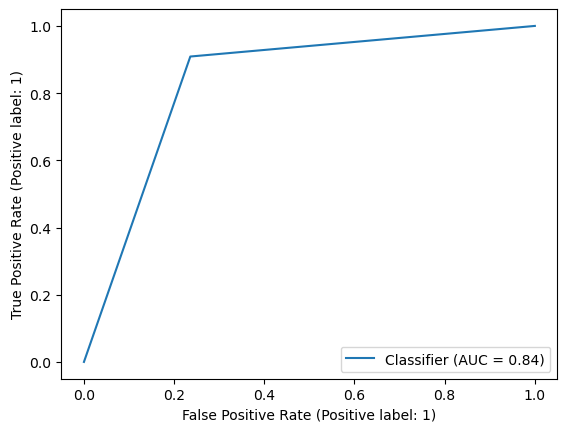

In [165]:
RocCurveDisplay.from_predictions(y_smt,treemodel_bal_pred)

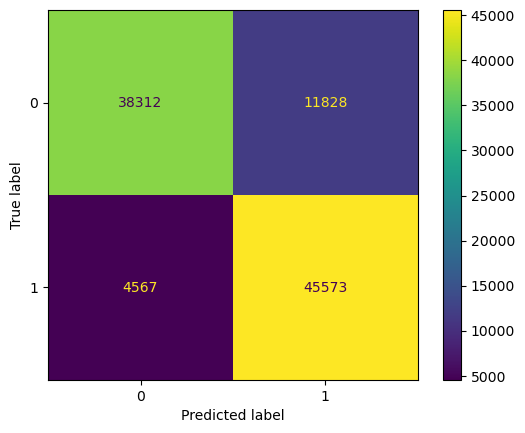

In [166]:
ConfusionMatrixDisplay.from_predictions(y_smt,treemodel_bal_pred)

In [167]:
treemodel_bal_prob=treemodel_bal.predict_proba(x_smt)[:,1]

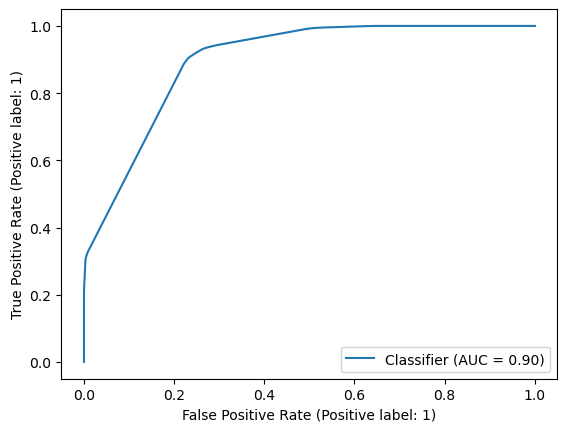

In [168]:
RocCurveDisplay.from_predictions(y_smt,treemodel_bal_prob)

In [169]:
treemodel_bal_pred1=treemodel_bal.predict(hrtestdf_clean)

In [170]:
pd.DataFrame(hrtestdf_clean).to_csv("tree_bal.csv")

# 3.Random Forest

In [171]:
rfcmodel_bal=rfc.fit(x_smt,y_smt)

In [172]:
rfcmodel_bal.score(x_smt,y_smt)

0.9990526525727962

In [173]:
rfcmodel_bal_pred=rfcmodel_bal.predict(x_smt)

In [174]:
print(classification_report(y_smt,rfcmodel_bal_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50140
           1       1.00      1.00      1.00     50140

    accuracy                           1.00    100280
   macro avg       1.00      1.00      1.00    100280
weighted avg       1.00      1.00      1.00    100280



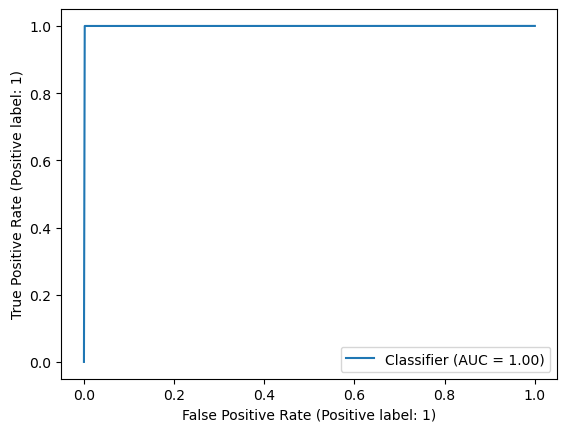

In [175]:
RocCurveDisplay.from_predictions(y_smt,rfcmodel_bal_pred)

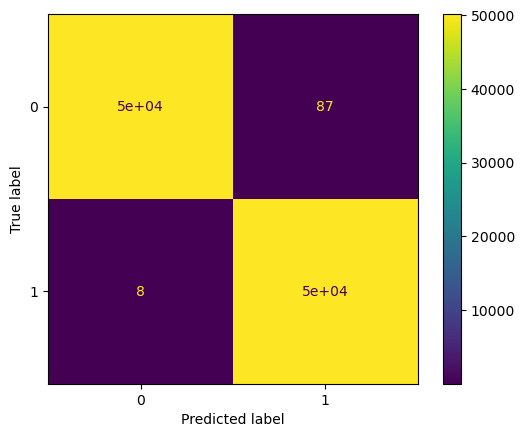

In [176]:
ConfusionMatrixDisplay.from_predictions(y_smt,rfcmodel_bal_pred)

In [177]:
rfcmodel_bal_prob=rfcmodel_bal.predict_proba(x_smt)[:,1]

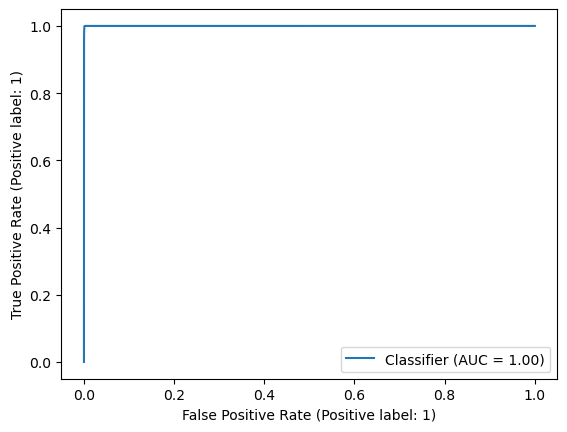

In [178]:
RocCurveDisplay.from_predictions(y_smt,rfcmodel_bal_prob)

In [179]:
rfcmodel_bal_pred1=rfcmodel_bal.predict(hrtestdf_clean)

In [180]:
pd.DataFrame(rfcmodel_bal_pred1).to_csv("rfc_bal.csv")

# 4.Gradient Boosting

In [181]:
gbcmodel_bal=gbc.fit(x_smt,y_smt)

In [182]:
gbcmodel_bal.score(x_smt,y_smt)

0.9889708815317112

In [183]:
gbcmodel_bal_pred=gbcmodel_bal.predict(x_smt)

In [184]:
print(classification_report(y_smt,gbcmodel_bal_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50140
           1       0.98      1.00      0.99     50140

    accuracy                           0.99    100280
   macro avg       0.99      0.99      0.99    100280
weighted avg       0.99      0.99      0.99    100280



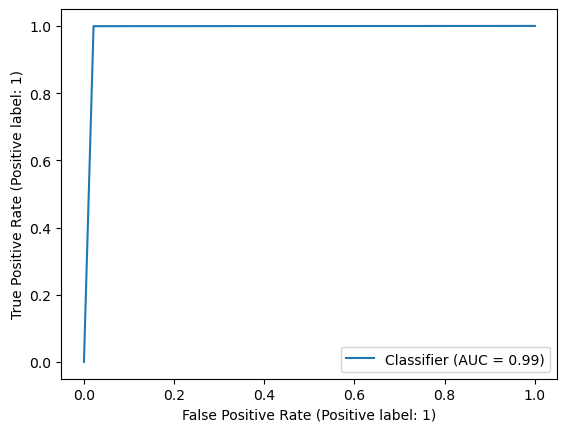

In [185]:
RocCurveDisplay.from_predictions(y_smt,gbcmodel_bal_pred)

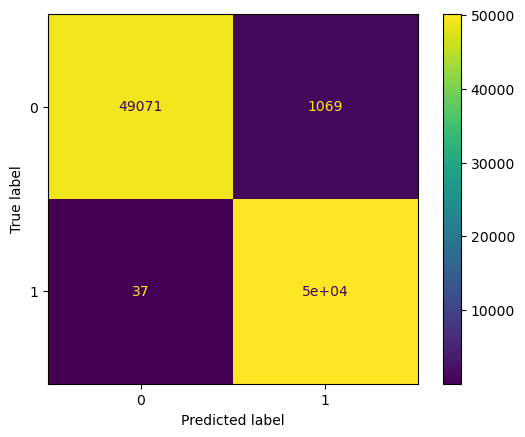

In [186]:
ConfusionMatrixDisplay.from_predictions(y_smt,gbcmodel_bal_pred)

In [187]:
gbcmodel_bal_prob=gbcmodel_bal.predict_proba(x_smt)[:,1]

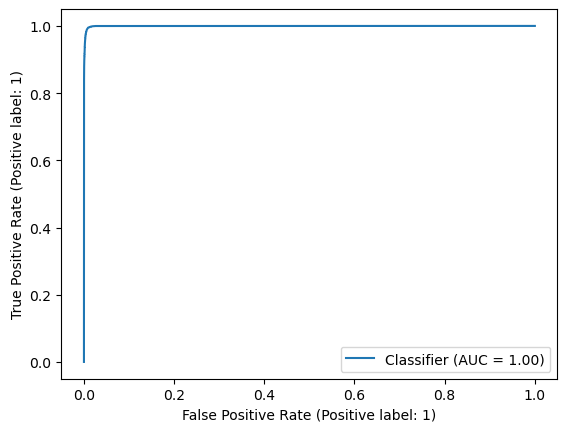

In [188]:
RocCurveDisplay.from_predictions(y_smt,gbcmodel_bal_prob)

In [189]:
gbcmodel_bal_pred1=gbcmodel_bal.predict(hrtestdf_clean)

In [190]:
pd.DataFrame(gbcmodel_bal_pred1).to_csv("gbc_bal.csv")

# Conclusion:

I have submitted predicted test values into the competition HR analytics: Predict whether employee is_promoted or not on Analytics vidhya website, among all those models, Gradient Boosting Model(max_depth=20) has the highest accuracy with a score of 0.3671.